In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('datasets/Churn_Modelling.csv')

In [3]:
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [5]:
df.drop(['RowNumber', 'CustomerId'], axis=1, inplace=True)

In [6]:
df.dtypes

Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [7]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [8]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [9]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}')


In [10]:
print_unique_col_values(df)

Surname: ['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


In [24]:
df.shape

(10000, 12)

In [14]:
df1 = df.drop('Surname', axis=1)

In [15]:
df1.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0

In [19]:
df1.shape

(10000, 11)

In [17]:
df1['Gender'].replace({'Female':1,'Male':0},inplace=True)

In [21]:
df2 = pd.get_dummies(df1, columns=['Geography'])

In [22]:
df2.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [48]:
df2['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

<AxesSubplot:xlabel='Exited', ylabel='count'>

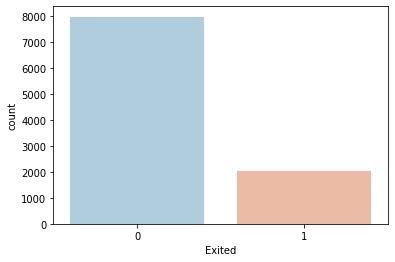

In [49]:
# sns.set_style('whitegrid')
sns.countplot(x='Exited',data=df2,palette='RdBu_r')

In [23]:
df2.head()

CreditScore  Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619       1   42       2       0.00              1          1   
1          608       1   41       1   83807.86              1          0   
2          502       1   42       8  159660.80              3          1   
3          699       1   39       1       0.00              2          0   
4          850       1   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  Geography_France  \
0               1        101348.88       1                 1   
1               1        112542.58       0                 0   
2               0        113931.57       1                 1   
3               0         93826.63       0                 1   
4               1         79084.10       0                 0   

   Geography_Germany  Geography_Spain  
0                  0                0  
1                  0                1  
2                  0                0  
3                  0                0  
4                  0                1

In [26]:
df2.dtypes

CreditScore            int64
Gender                 int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_France       uint8
Geography_Germany      uint8
Geography_Spain        uint8
dtype: object

In [27]:
cols_to_scale = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [29]:
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [30]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

CreditScore: [0.538 0.516 0.304 0.698 1.    0.59  0.944 0.052 0.302 0.668 0.356 0.294
 0.252 0.398 0.57  0.532 0.606 0.474 0.752 0.764 0.572 0.32  0.638 0.992
 0.454 0.812 0.442 0.448 0.122 0.482 0.366 0.406 0.34  0.744 0.25  0.28
 0.908 0.464 0.244 0.23  0.412 0.968 0.62  0.852 0.958 0.574 0.4   0.696
 0.47  0.876 0.61  0.502 0.612 0.75  0.322 0.528 0.784 0.674 0.41  0.506
 0.802 0.462 0.77  0.622 0.65  0.776 0.926 0.614 0.508 0.338 0.628 0.656
 0.814 0.132 0.63  0.854 0.386 0.312 0.286 0.604 0.8   0.758 0.592 0.594
 0.916 0.348 0.838 0.76  0.33  0.846 0.928 0.72  0.126 0.546 0.64  0.544
 0.87  0.51  0.258 0.67  0.376 0.424 0.742 0.556 0.636 0.956 0.648 0.55
 0.164 0.84  0.816 0.89  0.672 0.878 0.478 0.222 0.468 0.458 0.626 0.664
 0.886 0.682 0.27  0.6   0.808 0.37  0.732 0.378 0.712 0.472 0.562 0.734
 0.9   0.666 0.708 0.53  0.634 0.268 0.26  0.456 0.324 0.512 0.494 0.856
 0.328 0.35  0.73  0.46  0.914 0.342 0.818 0.332 0.722 0.536 0.586 0.642
 0.678 0.54  0.652 0.444 0.69  0.484 0.4

In [31]:
df2.head()

CreditScore  Gender       Age  Tenure   Balance  NumOfProducts  HasCrCard  \
0        0.538       1  0.324324       2  0.000000              1          1   
1        0.516       1  0.310811       1  0.334031              1          0   
2        0.304       1  0.324324       8  0.636357              3          1   
3        0.698       1  0.283784       1  0.000000              2          0   
4        1.000       1  0.337838       2  0.500246              1          1   

   IsActiveMember  EstimatedSalary  Exited  Geography_France  \
0               1         0.506735       1                 1   
1               1         0.562709       0                 0   
2               0         0.569654       1                 1   
3               0         0.469120       0                 1   
4               1         0.395400       0                 0   

   Geography_Germany  Geography_Spain  
0                  0                0  
1                  0                1  
2                  0                0  
3                  0                0  
4                  0                1

In [32]:
X = df2.drop('Exited', axis='columns')
y = df2['Exited']

In [34]:
X.head()

CreditScore  Gender       Age  Tenure   Balance  NumOfProducts  HasCrCard  \
0        0.538       1  0.324324       2  0.000000              1          1   
1        0.516       1  0.310811       1  0.334031              1          0   
2        0.304       1  0.324324       8  0.636357              3          1   
3        0.698       1  0.283784       1  0.000000              2          0   
4        1.000       1  0.337838       2  0.500246              1          1   

   IsActiveMember  EstimatedSalary  Geography_France  Geography_Germany  \
0               1         0.506735                 1                  0   
1               1         0.562709                 0                  0   
2               0         0.569654                 1                  0   
3               0         0.469120                 1                  0   
4               1         0.395400                 0                  0   

   Geography_Spain  
0                0  
1                1  
2                0  
3                0  
4                1

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [37]:
X_train.shape

(8000, 12)

In [38]:
X_test.shape

(2000, 12)

In [50]:
import tensorflow as tf
from tensorflow import keras 

model = keras.Sequential([
    keras.layers.Dense(12, input_shape=(12,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)


Epoch 1/100
250/250 [==============================] - 1s 994us/step - loss: 0.5456 - accuracy: 0.7656
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4828 - accuracy: 0.7918
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4645 - accuracy: 0.8009
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4604 - accuracy: 0.7991
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4534 - accuracy: 0.8049
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4400 - accuracy: 0.8127
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4353 - accuracy: 0.8136
Epoch 8/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4259 - accuracy: 0.8162
Epoch 9/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4234 - accuracy: 0.8156
Epoch 10/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4127 - accu

250/250 [==============================] - 0s 2ms/step - loss: 0.3447 - accuracy: 0.8631
Epoch 81/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3272 - accuracy: 0.8713
Epoch 82/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3285 - accuracy: 0.8684
Epoch 83/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3356 - accuracy: 0.8648
Epoch 84/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3296 - accuracy: 0.8643
Epoch 85/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3278 - accuracy: 0.8697
Epoch 86/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3358 - accuracy: 0.8628
Epoch 87/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3252 - accuracy: 0.8707
Epoch 88/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3324 - accuracy: 0.8659
Epoch 89/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3305 - accuracy: 

In [40]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.3590 - accuracy: 0.8535


[0.3590182662010193, 0.8535000085830688]

In [41]:
yp = model.predict(X_test)
yp[:5]

array([[0.03099504],
       [0.03016397],
       [0.09021577],
       [0.09020251],
       [0.03952527]], dtype=float32)

In [42]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [43]:
y_pred[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

In [44]:
y_test[:10]

7054    0
442     0
3954    0
2288    0
3196    0
6178    0
8351    0
5658    1
2065    0
413     1
Name: Exited, dtype: int64

In [45]:
from sklearn.metrics import confusion_matrix , classification_report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1595
           1       0.70      0.49      0.57       405

    accuracy                           0.85      2000
   macro avg       0.79      0.72      0.74      2000
weighted avg       0.84      0.85      0.84      2000



Text(69.0, 0.5, 'Truth')

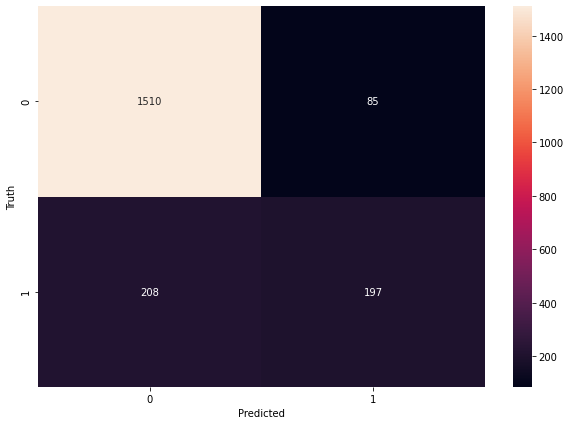

In [47]:
import seaborn as sns
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')